In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('uniswap_events.pickle')

In [3]:
df.shape

(147439, 20)

In [4]:
c_rule = 3

def classifier(event, eth_delta, token_delta, c_rule):
    if event == 'TokenPurchase':
        if (eth_delta / (10 ** (18-c_rule))).is_integer():
            return 'Convenience'
        else:
            return 'Arbitrage'
    elif event == 'EthPurchase':
        if (token_delta / (10 ** (18-c_rule))).is_integer():
            return 'Convenience'
        else:
            return 'Arbitrage'
    else:
        return 'None'

df['TradeClass'] = df.apply(lambda x: classifier(x['event'], x['eth_delta'], x['token_delta'], c_rule), axis=1)

In [5]:
df

,transactionHash,transaction_index,transaction_sender,address,data,topics,block_timestamp,blockNumber_dec,contract,event,...,block_group,agent,eth_delta,token_delta,uni_delta,eth_balance,token_balance,UNI_supply,invariant,TradeClass
0,0xbd773ccc33c831378f2aa2b7d4a9ae8a20ed9112ea9a...,150,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x06239653922ac7bea6aa2b19dc486b9361821d37712...,2018-11-02 10:27:36+00:00,6629139,DAI,AddLiquidity,...,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,30000000000000000000,5900000000000000000000,0,30000000000000000000,5900000000000000000000,0,177000000000000000000000000000000000000000,None
1,0xbd773ccc33c831378f2aa2b7d4a9ae8a20ed9112ea9a...,150,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x00000000000000000000000000000000000000000000...,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,2018-11-02 10:27:36+00:00,6629139,DAI,Transfer,...,662,0x0000000000000000000000000000000000000000,0,0,30000000000000000000,30000000000000000000,5900000000000000000000,30000000000000000000,177000000000000000000000000000000000000000,None
2,0xd53f01fc0cabbf4083da93a023ddb81de91320027077...,97,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427...,2018-11-02 10:33:56+00:00,6629171,DAI,EthPurchase,...,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,-25326059253325791,5000000000000000000,0,29974673940746674209,5905000000000000000000,30000000000000000000,177000449620109111204145000000000000000000,Convenience
3,0x53172898dbe437c784f7e4ac757087b28d1b06aa6b72...,53,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427...,2018-11-02 10:35:47+00:00,6629177,DAI,EthPurchase,...,662,0xf369af914dbed0ad7afdddebc631ee0fda1b4891,-10118429075406013,2000000000000000000,0,29964555511671268196,5907000000000000000000,30000000000000000000,177000629407442181233772000000000000000000,Convenience
4,0x6cef57fd37d7a2602c1236ff080c61c37e10980c7e3b...,24,0x11e4857bb9993a50c685a79afad4e6f65d518dda,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee8885...,2018-11-02 10:38:18+00:00,6629190,DAI,TokenPurchase,...,662,0x11e4857bb9993a50c685a79afad4e6f65d518dda,10000000000000000,-1964761376358359468,0,29974555511671268196,5905035238623641640532,30000000000000000000,177000806558499339943044863018842396120272,Convenience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147434,0x4c4d18cda4948561bf4df0e9cbfac4b7e9aedfea0285...,13,0xb14d1163e4b3cb18edf864b523ed42a87c21f68c,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee8885...,2019-12-31 23:31:34+00:00,9193158,DAI,TokenPurchase,...,919,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf,555227276348537093,-71129353666089377834,0,5013841555546109396965,661804343765215722063362,3304234867026987131356,3318182120410961321903054254127069667340496330,Arbitrage
147435,0xf701ddbf48fc7ea18079f5bd9b7a29a5485abbee71ae...,29,0x614800dc2c7372f2595e66ca62cc2fa485f00c20,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0xcd60aa75dea3072fbc07ae6d7d856b5dc5f4eee8885...,2019-12-31 23:31:44+00:00,9193160,DAI,TokenPurchase,...,919,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf,494601926415615730,-63347970222414138488,0,5014336157472525012695,661740995794993307924874,3304234867026987131356,3318191802096709075939561492313859130956275430,Arbitrage
147436,0x06257f58f391b2fa9201cf4fc09e668f1e0b03c59b96...,27,0xffbfdb803d38d794b5785ee0ac09f83b429d11b5,0x09cabec1ead1c0ba254b09efb3ee13841712be14,0x,[0x7f4091b46c33e918a0f3aa42307641d17bb67029427...,2019-12-31 23:45:49+00:00,9193211,DAI,EthPurchase,...,919,0x8018280076d7fa2caa1147e441352e8a89e1ddbe,-2425103627055529511,312610256829251059712,0,5011911053845469483184,662053606051822558984586,3304234867026987131356,33181537864093832943183289836950

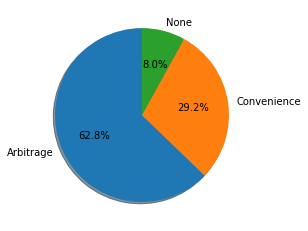

In [6]:
plt.pie(df['TradeClass'].value_counts(), labels=['Arbitrage', 'Convenience', 'None'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()